<a href="https://colab.research.google.com/github/NavyaKiran/KMeans-Customer-Segmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('Mall_Customers.csv')

In [74]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

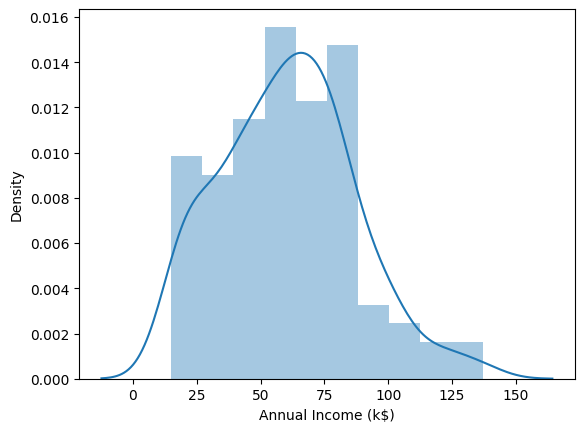

In [77]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Annual Income (k$)'])
#Income of most people lies in the 50k - 60k range

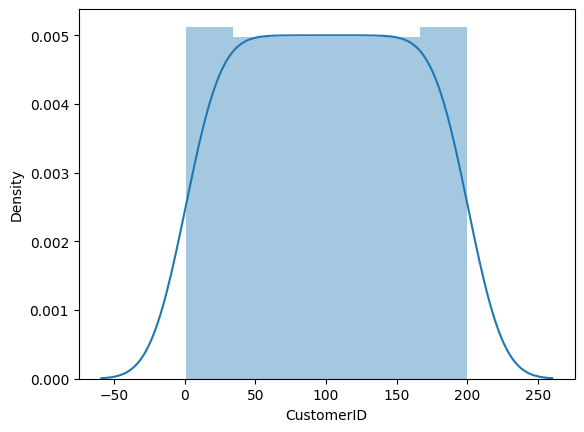

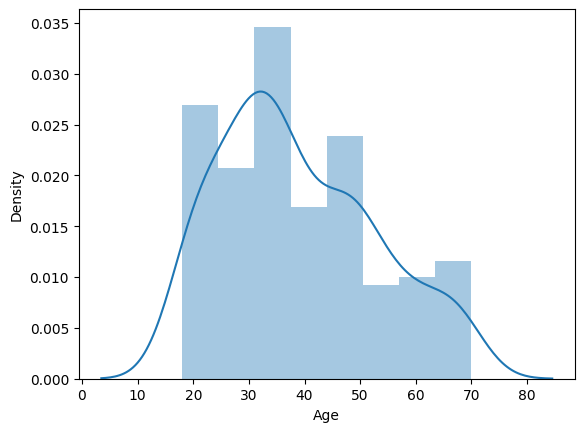

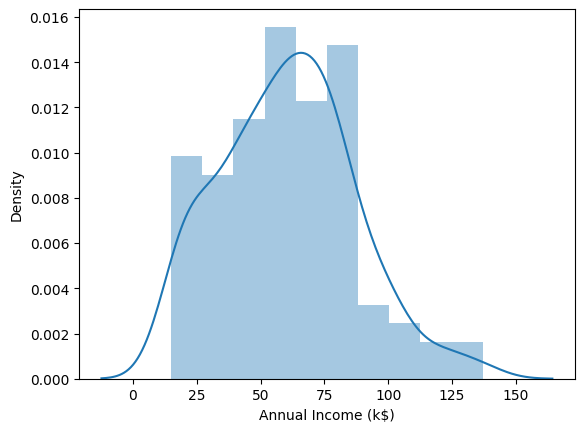

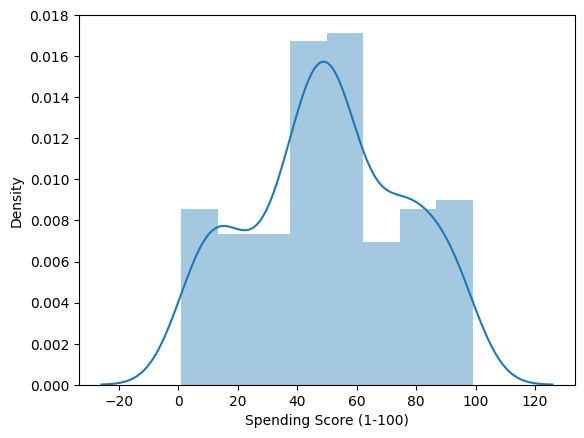

In [78]:
columns = [column for column in data.columns if (data[column].dtype == 'int') | (data[column].dtype == 'float')]
#columns
for column in columns:
  plt.figure()
  sns.distplot(data[column])
#ignore customerID

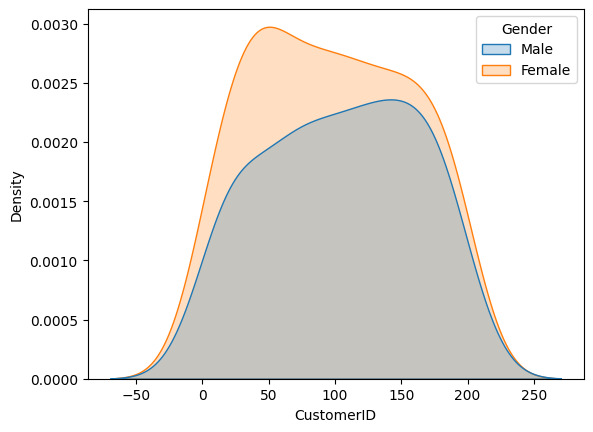

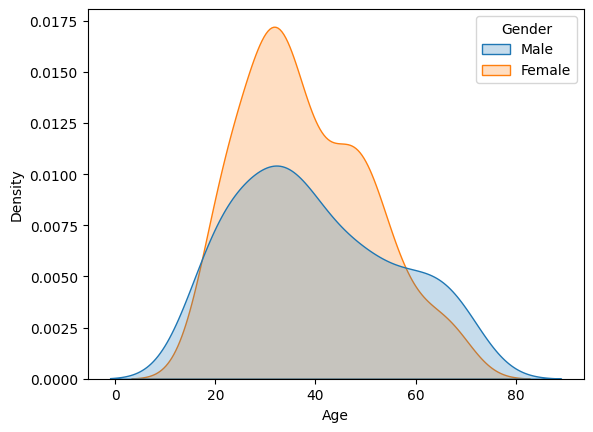

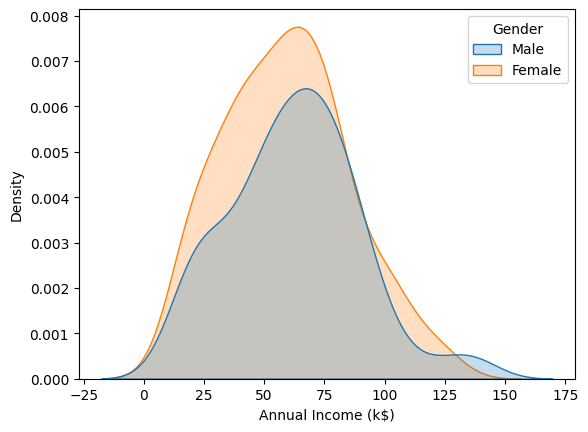

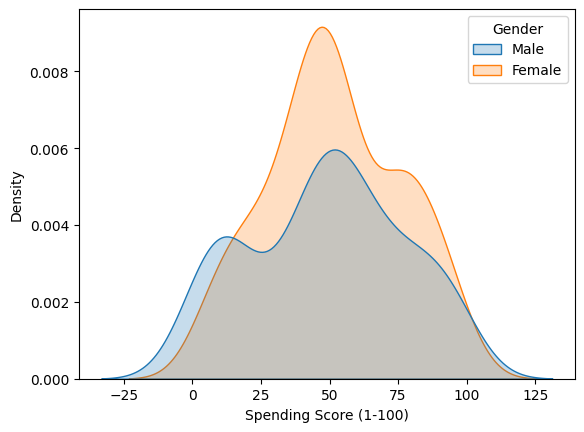

In [79]:
for column in columns:
  plt.figure()
  sns.kdeplot(data = data, x = column, hue = 'Gender', shade = True)

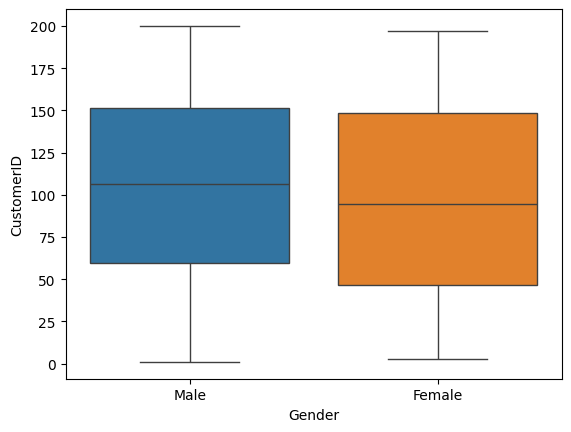

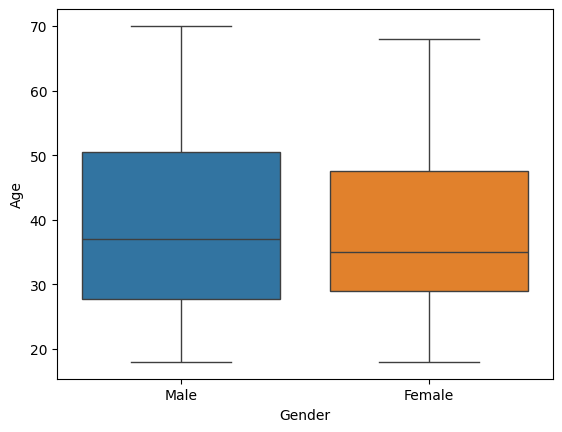

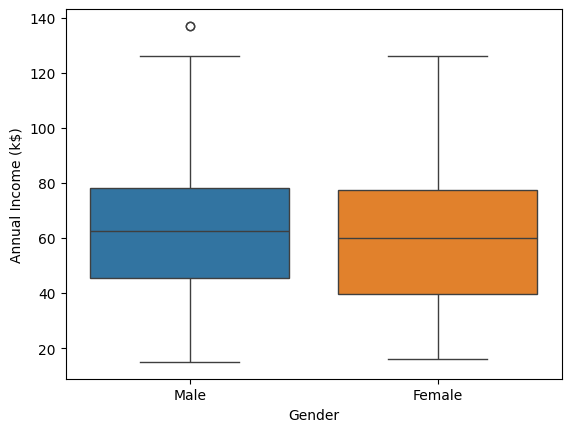

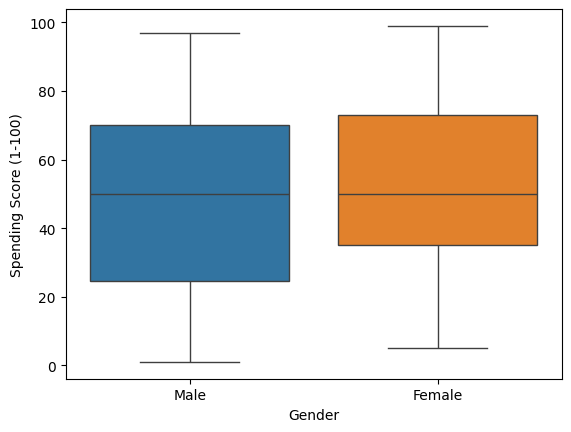

In [80]:
for column in columns:
  plt.figure()
  sns.boxplot(data = data, x = 'Gender', y = column, hue = 'Gender')
  #outlier in annual income

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

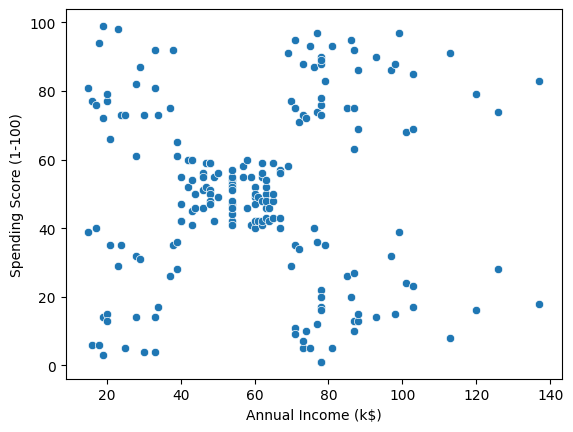

In [81]:
sns.scatterplot(data = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')
#some clusters are already visible here

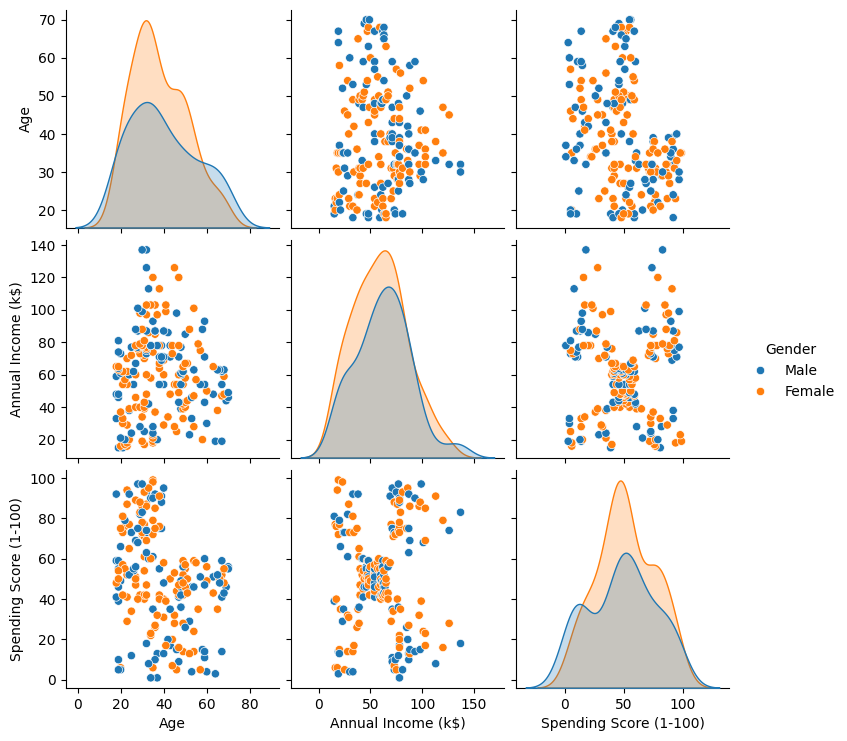

In [84]:
#data = data.drop(columns = ['CustomerID'], axis = 1)
sns.pairplot(data, hue = 'Gender')

In [86]:
data.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [87]:
#What are the correlations between the variables?
data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

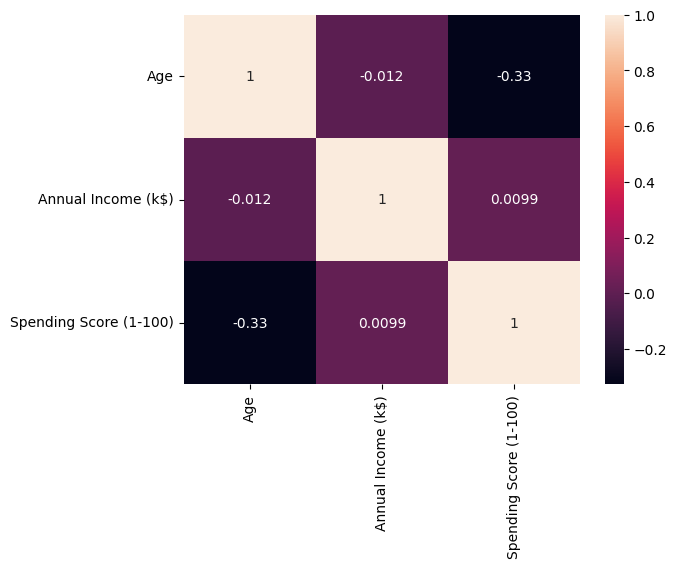

In [88]:
#map the correlations
sns.heatmap(data.corr(), annot = True)

In [91]:
from sklearn.cluster import KMeans
kmeans1 = KMeans()

In [92]:
#BiVariate Analysis (Clustering)
kmeans1.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Spending and Income cluster'] = kmeans1.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [93]:
inertia_scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores.append(kmeans.inertia_)

In [94]:
inertia_scores

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30273.394312070042,
 25094.499414311184,
 21829.13563877983,
 19657.78360870395]

Text(0, 0.5, 'Inertia Scores')

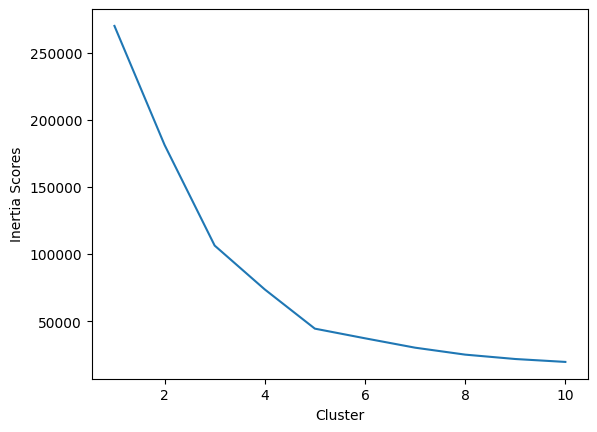

In [95]:
plt.plot(range(1, 11), inertia_scores)
plt.xlabel("Cluster")
plt.ylabel('Inertia Scores')

#choose n_cluster = 5

In [97]:
cluster_5 = KMeans(n_clusters = 5)
cluster_5.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Spending and Income cluster 5'] = cluster_5.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income cluster,Spending and Income cluster 5
0,Male,19,15,39,3,4
1,Male,21,15,81,4,0
2,Female,20,16,6,3,4
3,Female,23,16,77,4,0
4,Female,31,17,40,3,4


In [98]:
data.groupby(['Spending and Income cluster 5'])['Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

#the third cluster should be the target because of their comparitively high spending score

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster 5,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

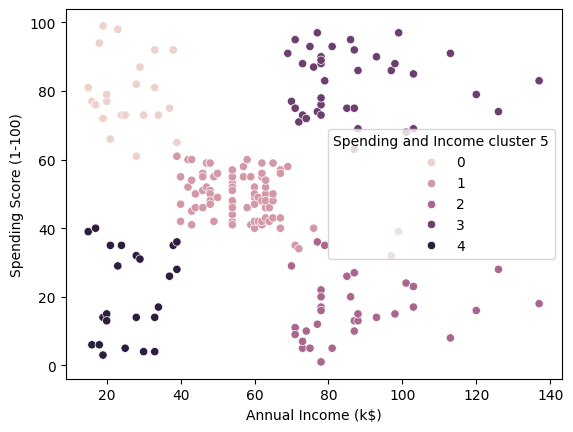

In [99]:
#Visualize the clusters using a scatter plot

sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income cluster 5', data = data)